# Bundesliga 2023/2024 Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from math import pi

In [2]:
statistics_df = pd.read_csv('files/statistics_2023_24.csv')
home_away_df = pd.read_csv('files/home_away_23_24.csv')

In [3]:
print(statistics_df)
print(home_away_df)

    position                      team  goals  shots  shots_against_post_bar  \
0         12             VfL Wolfsburg     41    406                       8   
1          6       Eintracht Frankfurt     51    393                       3   
2         13           1. FSV Mainz 05     39    471                      11   
3         17                1. FC Köln     28    430                       8   
4         16           VfL Bochum 1848     42    509                       4   
5          7            TSG Hoffenheim     66    462                       9   
6          1       Bayer 04 Leverkusen     89    616                      17   
7          9          SV Werder Bremen     48    398                       9   
8         15           FC Union Berlin     33    403                       9   
9         11               FC Augsburg     50    437                       8   
10         8     1. FC Heidenheim 1846     50    393                       8   
11        10       Sport-Club Freiburg  

In [4]:
# Cleaning home_away table
df_split = pd.read_csv('files/home_away_23_24.csv', header=None)
df_split = df_split[0].str.split(',', expand=True)

df_split.columns = df_split.iloc[0]
home_away_df = df_split[1:].reset_index(drop=True)

home_away_df.columns = home_away_df.columns.str.replace('"', '').str.strip()
home_away_df = home_away_df.applymap(lambda x: x.replace('"','').strip() if isinstance(x, str) else x)

home_away_df.head()


C:\Users\milos\AppData\Local\Temp\ipykernel_15736\2963800135.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  home_away_df = home_away_df.applymap(lambda x: x.replace('"','').strip() if isinstance(x, str) else x)


,position,team,matches,wins_total,draws_total,lost_total,goals_scored,goals_received,goals_difference,wins_home,...,losses_away,goals_scored_away,goals_received_away,goal_difference_away,total_goals_scored,total_goals_received,total_goal_difference,points_home,points_away,total_points
0,1,Bayer 04 Leverkusen,34,28,6,0,89,24,65,14,...,0,42,13,29,89,24,65,45,45,90
1,2,VfB Stuttgart,34,23,4,7,78,39,39,13,...,6,28,24,4,78,39,39,42,31,73
2,3,FC Bayern München,34,23,3,8,94,45,49,14,...,6,41,33,8,94,45,49,43,29,72
3,4,RB Leipzig,34,19,8,7,77,39,38,11,...,5,37,27,10,77,39,38,37,28,65
4,5,Borussia Dortmund,34,18,9,7,68,43,25,10,...,3,31,21,10,68,43,25,33,30,63


In [5]:
# Remove leading/trailing spaces from column names
statistics_df.columns = statistics_df.columns.str.strip()

# Clean the 'team' column by removing quotes and extra spaces
statistics_df['team'] = statistics_df['team'].str.strip().str.replace('"','')

# Convert numeric columns to float/int
numerical_cols = ['goals','shots','shots_against_post_bar','own_goals',
                  'penalties','penalties_scored','successful_passes_percent',
                  'possession_percent','duels_won','aerial_duels_won',
                  'crosses_from_open_play','yellow_cards','red_cards',
                  'cards','fouls_committed','distance_covered_km','sprints',
                  'intensive_runs']

for col in numerical_cols:
    statistics_df[col] = pd.to_numeric(statistics_df[col], errors='coerce')

In [6]:
combined_df = pd.merge(statistics_df, home_away_df, on='team', how='left')
combined_df = combined_df.reset_index(drop=True)

In [7]:
# Sort by position
combined_df = combined_df.sort_values(by='position_x', ascending=True).reset_index(drop=True)

combined_df = combined_df.rename(columns={'position_x':'position'})

combined_df.head(20)

,position,team,goals,shots,shots_against_post_bar,own_goals,penalties,penalties_scored,successful_passes_percent,possession_percent,...,losses_away,goals_scored_away,goals_received_away,goal_difference_away,total_goals_scored,total_goals_received,total_goal_difference,points_home,points_away,total_points
0,1,Bayer 04 Leverkusen,89,616,17,0,8,8,89.8,58,...,0,42,13,29,89,24,65,45,45,90
1,2,VfB Stuttgart,78,527,13,3,8,5,88.4,57,...,6,28,24,4,78,39,39,42,31,73
2,3,FC Bayern München,94,628,16,0,5,5,89.8,59,...,6,41,33,8,94,45,49,43,29,72
3,4,RB Leipzig,77,534,9,1,7,4,86.5,54,...,5,37,27,10,77,39,38,37,28,65
4,5,Borussia Dortmund,68,497,9,2,6,6,87.1,57,...,3,31,21,10,68,43,25,33,30,63
5,6,Eintracht Frankfurt,51,393,3,0,3,2,83.6,50,...,7,22,29,-7,51,50,1,29,18,47
6,7,TSG Hoffenheim,66,462,9,1,6,6,83.5,49,...,8,35,35,0,66,66,0,23,23,46
7,8,1. FC Heidenheim 1846,50,393,8,3,3,2,77.3,43,...,7,20,29,-9,50,55,-5,26,16,42
8,9,SV Werder Bremen,48,398,9,1,6,5,82.7,47,...,8,19,28,-9,48,54,-6,25,17,42
9,10,Sport-Club Freiburg,45,396,10,1,9,7,81.4,46,...,9,17,28,-11,45,58,-13,22,20,42


# Analysis

### 1 Goal Efficiency: Shots vs Goals & Correlation

Correlation shots vs goals: 0.8299461949759294
Correlation goals vs league position: -0.9003266619882506


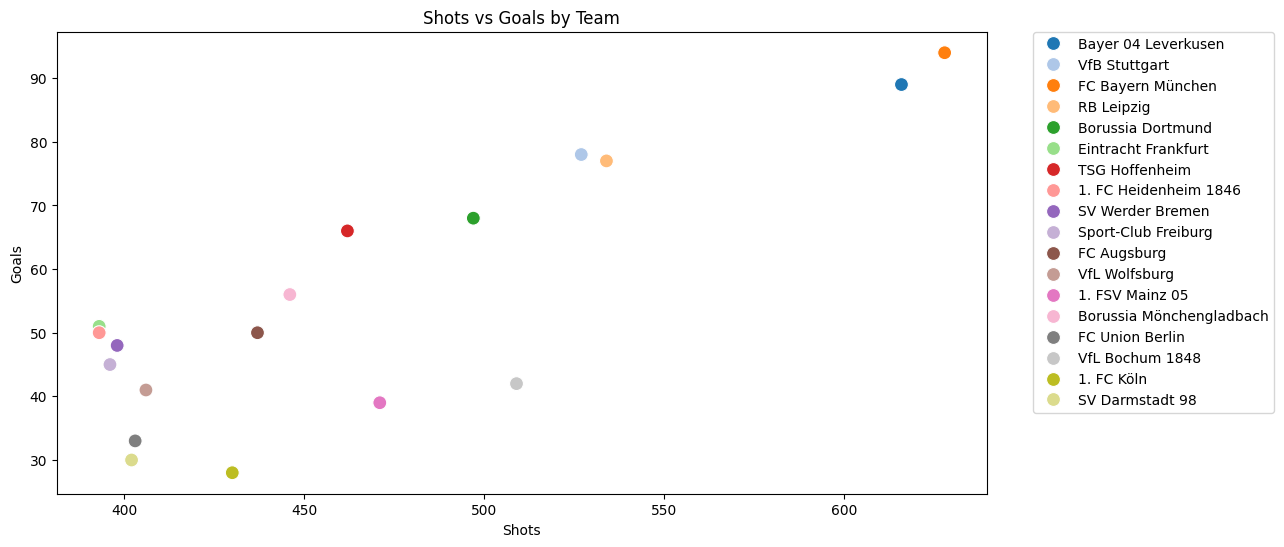

In [8]:
combined_df['avg_shots_to_score'] = combined_df.apply(
    lambda row: row['shots']/row['goals'] if row['goals'] > 0 else np.nan, axis=1
)

# Correlations
correlation_shots_goals = combined_df[['goals', 'shots']].corr().iloc[0,1]
correlation_goals_position = combined_df[['position', 'goals']].corr().iloc[0,1]

print("Correlation shots vs goals:", correlation_shots_goals)
print("Correlation goals vs league position:", correlation_goals_position)

# Plot
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=combined_df, 
    x='shots', 
    y='goals', 
    hue='team',       # color by team
    palette='tab20',  # or 'tab10' for fewer colors
    s=100
)
plt.title('Shots vs Goals by Team')
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # move legend outside plot
plt.show()


### 2. Possession vs Successful Passes & Goals correlation

Correlation possession vs successful passes: 0.8738339203421143
Correlation possession vs goals: 0.8819634635877328
Correlation passes vs position: -0.768623390280459


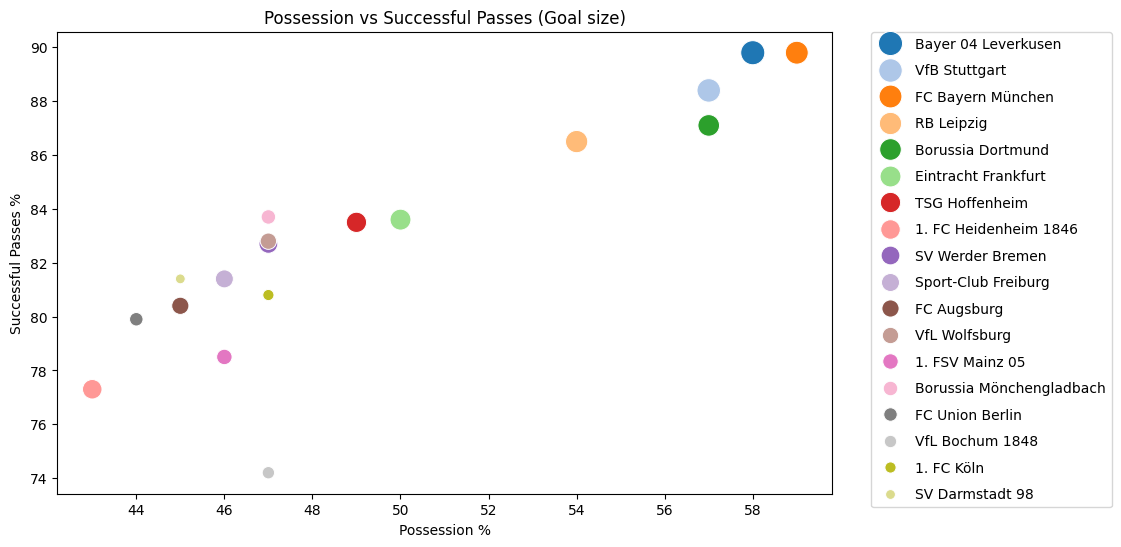

In [9]:
cor_poss_pass = combined_df[['possession_percent','successful_passes_percent']].corr().iloc[0,1]
cor_poss_goals = combined_df[['possession_percent','goals']].corr().iloc[0,1]
cor_pass_pos = combined_df[['successful_passes_percent','position']].corr().iloc[0,1]

print("Correlation possession vs successful passes:", cor_poss_pass)
print("Correlation possession vs goals:", cor_poss_goals)
print("Correlation passes vs position:", cor_pass_pos)

# plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=combined_df,
    x='possession_percent',
    y='successful_passes_percent',
    hue='team',
    palette='tab20',
    size='team',
    sizes=(50,300),         # min-max size of points
    legend='full'
)
plt.title('Possession vs Successful Passes (Goal size)')
plt.xlabel('Possession %')
plt.ylabel('Successful Passes %')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=10, labelspacing=0.9)
plt.show()

### 3. Distance Covered, Sprints & Intensive Runs

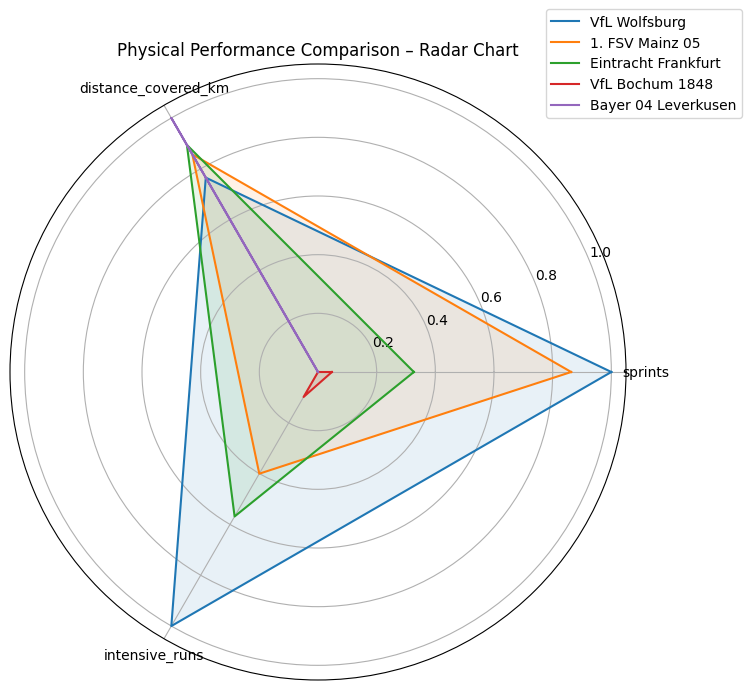

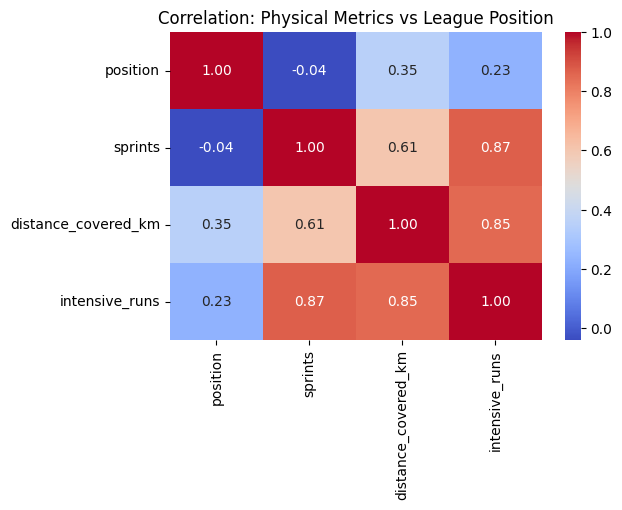

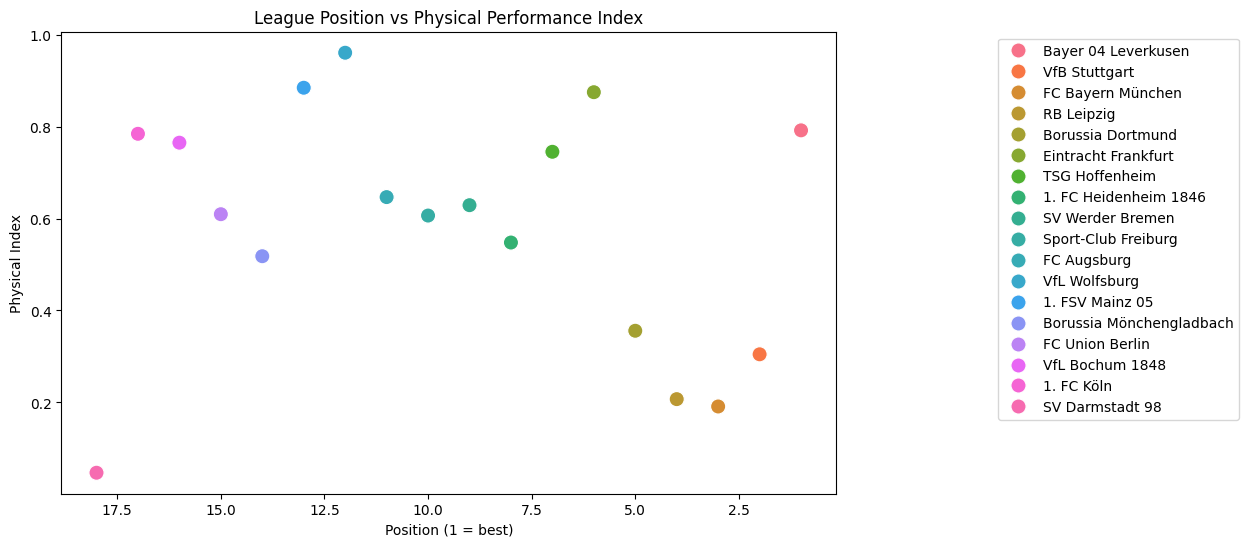

In [10]:
# 1. Radar chart – top 5 teams by physical activity

top_sprints = combined_df[['team','distance_covered_km','sprints','intensive_runs']] \
    .sort_values(by='sprints', ascending=False)

top_sprints.head(10)

radar_df = top_sprints[['team','sprints','distance_covered_km','intensive_runs']].head(5)
radar_df.set_index('team', inplace=True)

# Normalize values 0–1 for comparison
norm = (radar_df - radar_df.min()) / (radar_df.max() - radar_df.min())

categories = norm.columns.tolist()
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # close the loop

plt.figure(figsize=(8,8))
for team in norm.index:
    values = norm.loc[team].tolist()
    values += values[:1]
    plt.polar(angles, values, label=team)
    plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories)
plt.title('Physical Performance Comparison – Radar Chart')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

# 2. Heatmap – correlation: physical metrics vs league position

corr_cols = ['position','sprints','distance_covered_km','intensive_runs']
plt.figure(figsize=(6,4))
sns.heatmap(combined_df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Physical Metrics vs League Position')
plt.show()


# 3. Scatter plot – league position vs physical performance index

# Normalize metrics
scaler = MinMaxScaler()
combined_df[['spr_norm','dist_norm','int_norm']] = scaler.fit_transform(
    combined_df[['sprints','distance_covered_km','intensive_runs']]
)

# Weighted physical index
combined_df['physical_index'] = combined_df['spr_norm']*0.4 + combined_df['dist_norm']*0.3 + combined_df['int_norm']*0.3

plt.figure(figsize=(10,6))
sns.scatterplot(data=combined_df, x='position', y='physical_index', hue='team', s=120)
plt.gca().invert_xaxis()  # Best positions on the left
plt.title('League Position vs Physical Performance Index')
plt.xlabel('Position (1 = best)')
plt.ylabel('Physical Index')
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()

### 5. Work Rate vs Wins/Goals correlations

In [11]:

combined_df['wins_total'] = pd.to_numeric(combined_df['wins_total'], errors='coerce')
combined_df['goals_scored'] = pd.to_numeric(combined_df['goals'], errors='coerce')

# Metrics and outcomes
metrics = ['distance_covered_km', 'sprints', 'intensive_runs']
outcomes = ['wins_total', 'goals_scored']

for outcome in outcomes:
    print(f"\nCorrelation with {outcome.replace('_', ' ').title()}:")
    for metric in metrics:
       
        if metric in combined_df.columns:
            corr = combined_df[[metric, outcome]].corr().iloc[0,1]
            print(f"{metric.replace('_',' ').title()} vs {outcome.replace('_',' ').title()}: {corr:.2f}")



Correlation with Wins Total:
Distance Covered Km vs Wins Total: -0.38
Sprints vs Wins Total: -0.02
Intensive Runs vs Wins Total: -0.30

Correlation with Goals Scored:
Distance Covered Km vs Goals Scored: -0.45
Sprints vs Goals Scored: -0.12
Intensive Runs vs Goals Scored: -0.41


### 6. Top Teams by Goal Efficiency ( average shoot per goal)

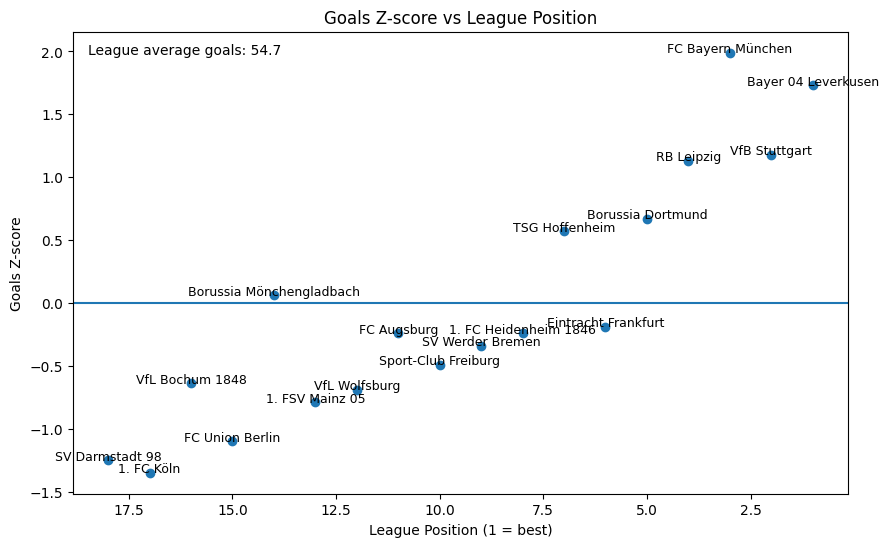

League average goals: 54.7
The zero line in the chart represents the league average in standardized terms (z-score).


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ League average & standard deviation
league_avg_goals = combined_df['goals'].mean()
league_std_goals = combined_df['goals'].std()

# 2️⃣ Z-score goals
combined_df['z_score_goals'] = (
    (combined_df['goals'] - league_avg_goals) / league_std_goals
).round(2)

# 3️⃣ Scatter plot: z-score vs league position
plt.figure(figsize=(10, 6))

plt.scatter(
    combined_df['position'],
    combined_df['z_score_goals']
)

# 4️⃣ Reference line (league average = z-score 0)
plt.axhline(0)

# 5️⃣ Labels & title
plt.xlabel('League Position (1 = best)')
plt.ylabel('Goals Z-score')
plt.title('Goals Z-score vs League Position')

# 6️⃣ Team labels
for _, row in combined_df.iterrows():
    plt.text(
        row['position'],
        row['z_score_goals'],
        row['team'],
        fontsize=9,
        ha='center'
    )

# 7️⃣ Invert x-axis (1st place on the left)
plt.gca().invert_xaxis()

# 8️⃣ League average annotation (context, not a new axis)
plt.text(
    0.02,
    0.95,
    f'League average goals: {league_avg_goals:.1f}',
    transform=plt.gca().transAxes,
    fontsize=10
)

plt.show()

print(f"League average goals: {league_avg_goals:.1f}")
print(
    "The zero line in the chart represents the league average in standardized terms (z-score)."
)


